In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://www.fdic.gov/bank-failures/download-data', encoding='latin-1')

In [4]:
df.head()

,Bank Name,City,State,Cert,Acquiring Institution,Closing Date,Fund
0,Pulaski Savings Bank,Chicago,IL,28611,Millennium Bank,17-Jan-25,10548
1,First National Bank of Lindsay,Lindsay,OK,4134,First Bank & Trust Co.,18-Oct-24,10547
2,Republic First Bank dba Republic Bank,Philadelphia,PA,27332,"Fulton Bank, National Association",26-Apr-24,10546
3,Citizens Bank,Sac City,IA,8758,Iowa Trust & Savings Bank,3-Nov-23,10545
4,Heartland Tri-State Bank,Elkhart,KS,25851,"Dream First Bank, N.A.",28-Jul-23,10544


In [5]:
df.shape

(571, 7)

In [6]:
# to check the technical info of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Bank Name               571 non-null    object
 1   City                    571 non-null    object
 2   State                   571 non-null    object
 3   Cert                    571 non-null    int64 
 4   Acquiring Institution   571 non-null    object
 5   Closing Date            571 non-null    object
 6   Fund                    571 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 31.4+ KB


In [7]:
# to check the data type of the columns
df.dtypes

Bank Name                 object
City                      object
State                     object
Cert                       int64
Acquiring Institution     object
Closing Date              object
Fund                       int64
dtype: object

In [8]:
# to show all the columns we have in the dataset
df.columns

Index(['Bank Name ', 'City ', 'State ', 'Cert ', 'Acquiring Institution ',
       'Closing Date ', 'Fund'],
      dtype='object')

In [18]:
# to clear the whitespace in the columns
df.columns = df.columns.str.strip()
df.columns

Index(['Bank Name', 'City', 'State', 'Cert', 'Acquiring Institution',
       'Closing Date', 'Fund'],
      dtype='object')

In [19]:
df['Cert'].value_counts()

Cert
21029    1
28611    1
4134     1
27332    1
8758     1
        ..
10716    1
58112    1
58317    1
21111    1
18265    1
Name: count, Length: 571, dtype: int64

In [ ]:
# to drop columns Cert and Fund
df = df.drop(['Cert', 'Fund'], axis=1)

In [23]:
df.head()

,Bank Name,City,State,Acquiring Institution,Closing Date
0,Pulaski Savings Bank,Chicago,IL,Millennium Bank,17-Jan-25
1,First National Bank of Lindsay,Lindsay,OK,First Bank & Trust Co.,18-Oct-24
2,Republic First Bank dba Republic Bank,Philadelphia,PA,"Fulton Bank, National Association",26-Apr-24
3,Citizens Bank,Sac City,IA,Iowa Trust & Savings Bank,3-Nov-23
4,Heartland Tri-State Bank,Elkhart,KS,"Dream First Bank, N.A.",28-Jul-23


In [24]:
# to show the number of times that each city appears
df['City'].value_counts()

City
Chicago        21
Atlanta        10
Phoenix         6
Naples          5
Las Vegas       4
               ..
Argonia         1
Saint Elmo      1
Moline          1
New Orleans     1
Vancouver       1
Name: count, Length: 437, dtype: int64

In [25]:
# to show the number of times that each city appears in the first five rows
df['City'].value_counts().head()

City
Chicago      21
Atlanta      10
Phoenix       6
Naples        5
Las Vegas     4
Name: count, dtype: int64

In [26]:
# to convert CLosing date datatype to datetime
df['Closing Date'] = pd.to_datetime(df['Closing Date'])

C:\Users\codetech\AppData\Local\Temp\ipykernel_6608\1466740284.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Closing Date'] = pd.to_datetime(df['Closing Date'])


In [28]:

# to check the datatype of the dataset again
df.dtypes
# df['Closing Date'].dtype

Bank Name                        object
City                             object
State                            object
Acquiring Institution            object
Closing Date             datetime64[ns]
dtype: object

In [30]:
# to display the first five rows to show the Closing Date value
df.head()

,Bank Name,City,State,Acquiring Institution,Closing Date
0,Pulaski Savings Bank,Chicago,IL,Millennium Bank,2025-01-17
1,First National Bank of Lindsay,Lindsay,OK,First Bank & Trust Co.,2024-10-18
2,Republic First Bank dba Republic Bank,Philadelphia,PA,"Fulton Bank, National Association",2024-04-26
3,Citizens Bank,Sac City,IA,Iowa Trust & Savings Bank,2023-11-03
4,Heartland Tri-State Bank,Elkhart,KS,"Dream First Bank, N.A.",2023-07-28


In [31]:
ycounts = df.groupby(df['Closing Date'].dt.year).size()

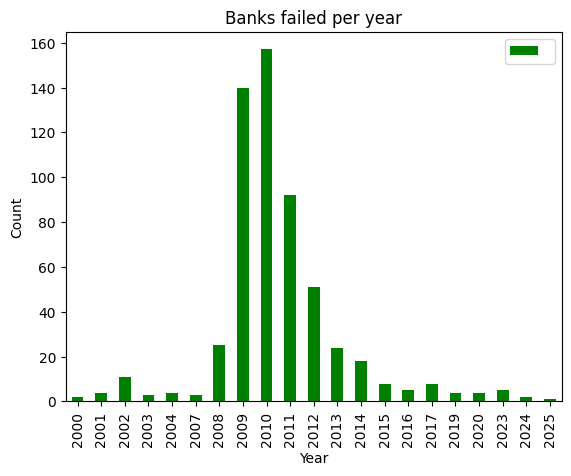

In [41]:
ycounts.plot(kind='bar', color='green', legend=1)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Banks failed per year')
plt.show()